<a href="https://colab.research.google.com/github/AndreyDyachkov/Data_analytics_with_Python/blob/main/08_moscow_restaurant_market_analysis/Telling_a_story_Market_analysis_of_catering_establishments_(Yandex).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market analysis of catering establishments

<b>Task:</b>
1. Prepare a study of the market of public catering establishments. Provide recommendations on the type of establishments, the number of seats, ​​location and the possibility of development.
2. Prepare a presentation for potential investors in a small cafe project.

<b>Data description: </b>
Rest_data table:
- id — object identifier;
- object_name — name of the catering facility;
- chain - chain restaurant;
- object_type — type of catering facility;
- address — address;
- number — number of seats.

### Stage 1. Getting data

#### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/rest_data.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


#### Checking for duplicates, missing values and wrong data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
df.duplicated().sum()

0

Checking id for uniqueness

In [6]:
df['id'].duplicated().sum()

0

There are no missing values or duplicates. Data types correspond to the information contained in the columns

#### EDA

Number of seats

In [7]:
df.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


The maximum number value is 1700 seats, which is quite a lot. Let's look at the distribution.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


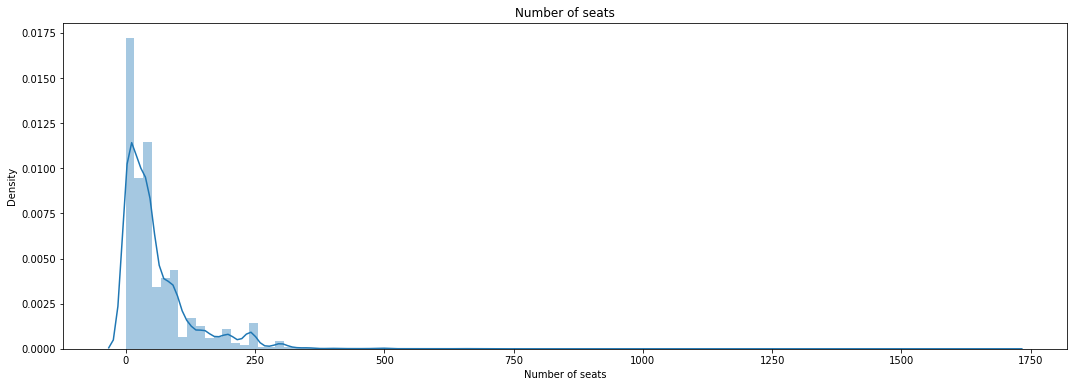

In [8]:
plt.figure(figsize=(18, 6))
sns.distplot(df['number'], bins=100) 
plt.title('Number of seats')
plt.xlabel('Number of seats')
plt.ylabel('Density')
plt.show()

It is a right-skewed distribution. Let'slook at the outliers.

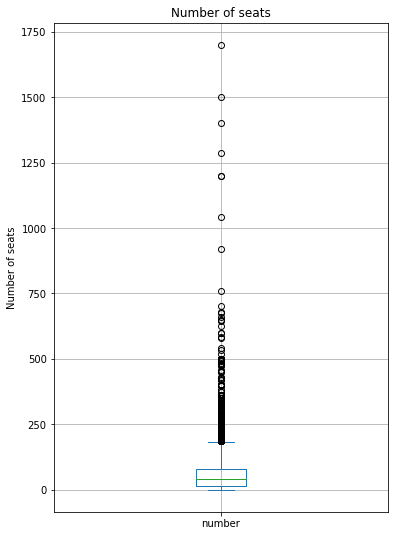

In [9]:
df.plot(kind='box', y='number', grid=True, figsize=(6,9), title='Number of seats')
plt.ylabel('Number of seats')
plt.show()

There are outliers. Let's try a violin plot.

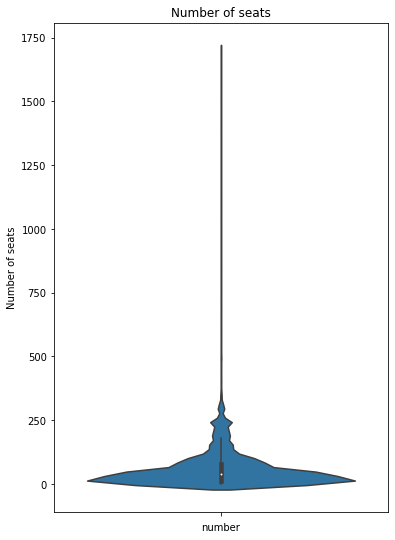

In [10]:
plt.figure(figsize=(6, 9))
sns.violinplot(y='number', data=df)
plt.title('Number of seats')
plt.xlabel('number')
plt.ylabel('Number of seats')
plt.show()

Let's check maximim value entries

In [11]:
df[df['number']>1000]

,id,object_name,chain,object_type,address,number
2313,26560,Ресторан «АЛЬФА»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корп...",1040
3686,27026,РУМ СЕРВИС,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
4480,27024,РУМ СЕРВИС,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, с...",1200
8148,80291,Банкетный зал Шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом...",1500
8345,27750,СТОЛОВАЯ-БУФЕТ,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, ст...",1288
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


Doesn't look like a mistake. Let's leave these values for now.

Let's look at the categorical data

In [12]:
df[['object_name','chain','object_type','address']].describe()

,object_name,chain,object_type,address
count,15366,15366,15366,15366
unique,10393,2,9,9108
top,Столовая,нет,кафе,"город Москва, Ходынский бульвар, дом 4"
freq,267,12398,6099,95


In [13]:
df['object_name'].value_counts()

Столовая                   267
Кафе                       236
Шаурма                     234
KFC                        155
Шоколадница                142
                          ... 
Столовая ТЦ «Энтузиаст»      1
Охунова У.Д.                 1
СОК ООО АВТОКОМБИНАТ 3       1
АВТОКОМБИНАТ 3               1
Кальянная «Мята Lounge»      1
Name: object_name, Length: 10393, dtype: int64

Let's strip and lower case

In [14]:
df['object_name'] = df['object_name'].str.strip().str.lower()
df['object_name'].value_counts()

столовая                      321
кафе                          278
шаурма                        250
шоколадница                   158
kfc                           155
                             ... 
столовая гуп «мосгортранс»      1
пиццерия «алло пицца»           1
bizone антикафе                 1
сирень                          1
кальянная «мята lounge»         1
Name: object_name, Length: 9924, dtype: int64

There is an effect - almost 500 records are gone

Chain column

In [15]:
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

chain - could be a boolean type, however, we won't change it now, just translate to English.

In [16]:
df['chain'] = df['chain'].replace({'да':'chain','нет':'non-chain'})
df['chain'].value_counts()

non-chain    12398
chain         2968
Name: chain, dtype: int64

Object_type column

In [17]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

object_type - There are 9 different object types. There are long names that do not look good on the charts, we will replace them with shorter alternative names and translate to English

In [18]:
df['object_type'] = df['object_type'].replace(
    {'предприятие быстрого обслуживания':'fast food'
     , 'магазин (отдел кулинарии)':'store'
     , 'кафе':'cafe'
     , 'столовая':'canteen'
     , 'ресторан':'restaurant'
     , 'бар':'bar'
     ,'буфет':'buffet'
     ,'кафетерий':'cafeteria'
     ,'закусочная':'diner'})

In [19]:
df['object_type'].value_counts()

cafe          6099
canteen       2587
restaurant    2285
fast food     1923
bar            856
buffet         585
cafeteria      398
diner          360
store          273
Name: object_type, dtype: int64

Let's clean the addresses and convert to lower register

In [20]:
df['address'].value_counts()

город Москва, Ходынский бульвар, дом 4                     95
город Москва, Пресненская набережная, дом 2                63
город Москва, проспект Мира, дом 211, корпус 2             60
город Москва, Кировоградская улица, дом 13А                53
город Москва, площадь Киевского Вокзала, дом 2             48
                                                           ..
город Москва, проспект Мира, дом 87                         1
город Москва, Новомосковская улица, дом 15А, строение 1     1
город Москва, улица Кондратюка, дом 5                       1
город Москва, 1-я Останкинская улица, дом 29                1
город Москва, улица Новый Арбат, дом 13                     1
Name: address, Length: 9108, dtype: int64

In [21]:
df['address'] = df['address'].str.strip().str.lower()

In [22]:
df['address'].value_counts()

город москва, ходынский бульвар, дом 4                     95
город москва, пресненская набережная, дом 2                63
город москва, проспект мира, дом 211, корпус 2             60
город москва, кировоградская улица, дом 13а                53
город москва, площадь киевского вокзала, дом 2             48
                                                           ..
город москва, проспект мира, дом 87                         1
город москва, новомосковская улица, дом 15а, строение 1     1
город москва, улица кондратюка, дом 5                       1
город москва, 1-я останкинская улица, дом 29                1
город москва, улица новый арбат, дом 13                     1
Name: address, Length: 9108, dtype: int64

No effect - the number of unique records has not changed. Checking for duplicate addresses

In [23]:
df[df['address']=='город москва, ходынский бульвар, дом 4']

,id,object_name,chain,object_type,address,number
11800,94102,barbecue bbq storege,non-chain,fast food,"город москва, ходынский бульвар, дом 4",20
11801,94433,chaikhana shurpa,non-chain,fast food,"город москва, ходынский бульвар, дом 4",50
11802,94667,хмели-сунели,non-chain,restaurant,"город москва, ходынский бульвар, дом 4",100
11803,96595,панчо пицца,chain,restaurant,"город москва, ходынский бульвар, дом 4",23
11804,96598,new york pizza,non-chain,cafe,"город москва, ходынский бульвар, дом 4",0
...,...,...,...,...,...,...
15151,215522,lavkalavka,chain,cafe,"город москва, ходынский бульвар, дом 4",0
15167,215276,cofix,chain,cafe,"город москва, ходынский бульвар, дом 4",0
15189,215445,starbucks,chain,cafeteria,"город москва, ходынский бульвар, дом 4",20
15219,222719,dunkin donuts,chain,cafeteria,"город москва, ходынский бульвар, дом 4",0


According to the map, this is a shopping center - the presence of 95 establishments is OK

<b>Results:</b> No errors were found in the categorical data. According to the number of seats, the distribution is right-skewed. There are outliers that we leave for now. Two long object type names have been replaced with shorter ones for better readability in graphs. Names of establishments and addresses have been cleaned up: spaces have been removed and reduced to lowercase.

### Stage 2. Analysis

#### Distribution of types of public catering facilities

In [24]:
types = df['object_type'].value_counts().reset_index()
types['%_of_total'] = types['object_type'] / types['object_type'].sum()
types

,index,object_type,%_of_total
0,cafe,6099,0.396915
1,canteen,2587,0.168359
2,restaurant,2285,0.148705
3,fast food,1923,0.125146
4,bar,856,0.055707
5,buffet,585,0.038071
6,cafeteria,398,0.025901
7,diner,360,0.023428
8,store,273,0.017766


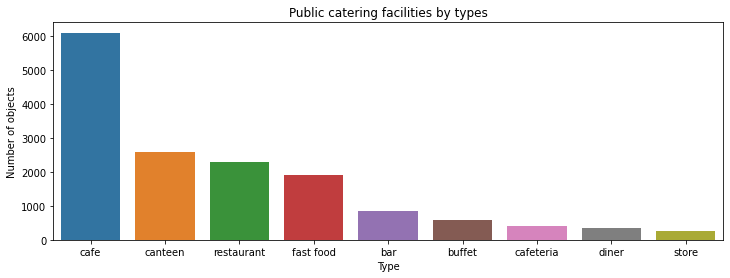

In [25]:
plt.figure(figsize=(12, 4))
sns.barplot(x='index', y ='object_type', data=types)
plt.title('Public catering facilities by types')
plt.xlabel('Type')
plt.ylabel('Number of objects')
plt.show()

<b>Results:</b>
Cafe is the most popular type, almost 40% of establishments belong to this type. Canteens, restaurants and fast-food restaurants are in second place. Each of them accounts for 13 to 17% of the total number of establishments

#### Chain and non-chain establishments

In [26]:
chain = df['chain'].value_counts().reset_index()
chain['%_of_total'] = chain['chain'] / chain['chain'].sum()
chain

,index,chain,%_of_total
0,non-chain,12398,0.806846
1,chain,2968,0.193154


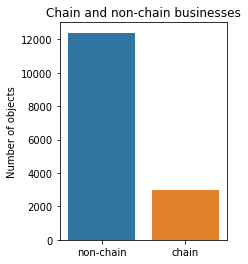

In [27]:
plt.figure(figsize=(3, 4))
sns.barplot(x='index', y ='chain', data=chain)
plt.title('Chain and non-chain businesses')
plt.xlabel('')
plt.ylabel('Number of objects')
plt.show()

<b>Results:</b> 80% of enterprises are non-chain

#### Which types of objects are chain businesses

Let's build a pivot table and calculate the % of chain businesses for each type of object

In [28]:
object_chain = df.pivot_table(index='object_type', columns='chain', values ='id', aggfunc='count').reset_index()
object_chain['chain%'] = (object_chain['chain'] / (object_chain['chain'] + object_chain['non-chain']) *100).round(2)
object_chain.sort_values(by='chain%', ascending=False)

chain,object_type,chain,non-chain,chain%
6,fast food,791,1132,41.13
8,store,78,195,28.57
7,restaurant,544,1741,23.81
2,cafe,1396,4703,22.89
5,diner,56,304,15.56
3,cafeteria,52,346,13.07
0,bar,37,819,4.32
1,buffet,11,574,1.88
4,canteen,3,2584,0.12


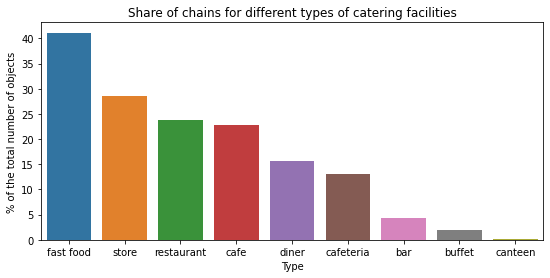

In [29]:
plt.figure(figsize=(9, 4))
sns.barplot(x='object_type', y ='chain%', data=object_chain.sort_values(by='chain%', ascending=False))
plt.title('Share of chains for different types of catering facilities')
plt.xlabel('Type')
plt.ylabel('% of the total number of objects')
plt.show()

<b>Results:</b> 41% of fast food enterprises are chain businesses. The smallest number of chains is in canteens, buffets and bars.

#### Typical characteristics of chain businesses

Let's look at the distribution of the number of establishments for chains

In [30]:
chain_size = df[df['chain']=='chain'].groupby('object_name')['id'].count().sort_values(ascending=False).reset_index()
chain_size

,object_name,id
0,шоколадница,157
1,kfc,155
2,макдоналдс,151
3,бургер кинг,137
4,теремок,94
...,...,...
572,кафе «хлеб насущный»,1
573,кафе «урюк» хивинская чайхона,1
574,кафе «торнадо»,1
575,кафе «тапчан»,1


There are chains with the number of establishments equal to 1. It could be errors or other objects are located in different regions. Let's look at the percentage of such establishments from the total number of chain establishments.

In [31]:
len(chain_size[chain_size['id']==1]) / len(chain_size['id'])

0.5736568457538995

In [32]:
chain_size['id'].describe()

count    577.000000
mean       5.143847
std       15.554623
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      157.000000
Name: id, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


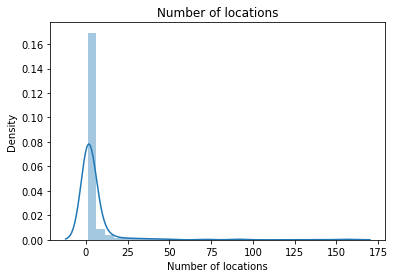

In [33]:
plt.figure(figsize=(6, 4))
sns.distplot(chain_size['id'], bins=30) 
plt.title('Number of locations')
plt.xlabel('Number of locations')
plt.ylabel('Density')
plt.show()

The average number of establishments is 1 and the histogram shows that most of the networks consist of one establishment. Let's leave networks with the number of locations 2 or more

In [34]:
chain_size = chain_size[chain_size['id']>=2]
chain_size

,object_name,id
0,шоколадница,157
1,kfc,155
2,макдоналдс,151
3,бургер кинг,137
4,теремок,94
...,...,...
241,кафе «costa coffee»,2
242,изба,2
243,зодиак,2
244,закусочная «бургер кинг»,2


In [35]:
chain_size['id'].describe()

count    246.000000
mean      10.719512
std       22.680536
min        2.000000
25%        2.000000
50%        4.000000
75%        7.000000
max      157.000000
Name: id, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


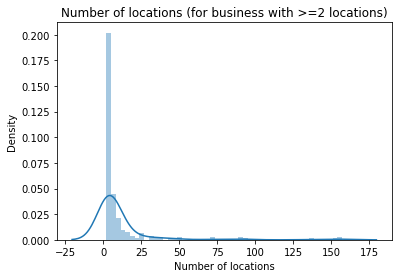

In [36]:
plt.figure(figsize=(6, 4))
sns.distplot(chain_size['id'], bins=50) 
plt.title('Number of locations (for business with >=2 locations)')
plt.xlabel('Number of locations')
plt.ylabel('Density')
plt.show()

The average number of establishments is 11, the histogram shows that most of the chains consist of a small number of establishments.

Number of seats

In [37]:
df[df['chain']=='да']['number'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: number, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


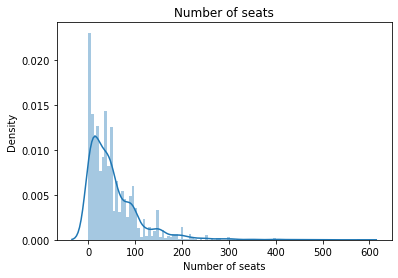

In [38]:
plt.figure(figsize=(6, 4))
sns.distplot(df[df['chain']=='chain']['number'], bins=100) 
plt.title('Number of seats')
plt.xlabel('Number of seats')
plt.ylabel('Density')
plt.show()

Let's calculate how many establishments do not have seats

In [39]:
chain_number = df[df['chain']=='да'].groupby('number')['id'].count().reset_index()
chain_number['%_of_total'] = chain_number['id'] / chain_number['id'].sum()
chain_number.sort_values(by='%_of_total', ascending=False)

,number,id,%_of_total


<b>Results:</b>
Most chains consist of a small number of establishments (average number of establishments is 11)
Chain businesses are characterized by a small number of seats (average 53, median 40), moreover, 9% of such enterprises do not have seats.

#### The average number of seats for each type of catering facility

In [40]:
df.groupby('object_type')['number'].mean().sort_values(ascending=False)

object_type
canteen       130.246618
restaurant     96.834136
buffet         51.129915
bar            43.494159
cafe           39.716019
fast food      20.552262
cafeteria       9.123116
diner           7.608333
store           5.589744
Name: number, dtype: float64

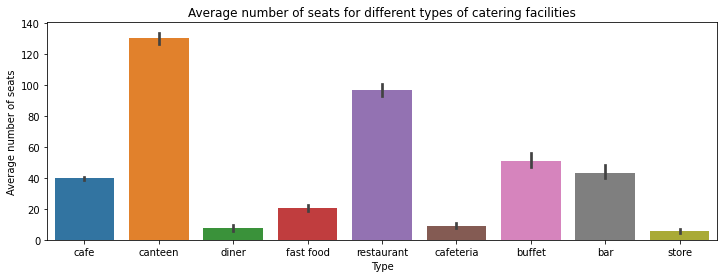

In [41]:
plt.figure(figsize=(12, 4))
sns.barplot(x='object_type', y ='number', data=df)
plt.title('Average number of seats for different types of catering facilities')
plt.xlabel('Type')
plt.ylabel('Average number of seats')
plt.show()

Let's look at the distribution on boxplot

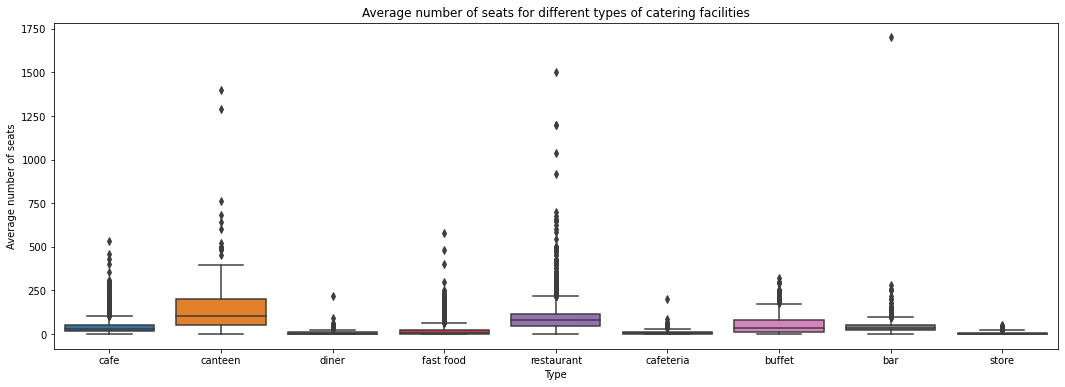

In [42]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='object_type', y ='number', data=df)
plt.title('Average number of seats for different types of catering facilities')
plt.xlabel('Type')
plt.ylabel('Average number of seats')
plt.show()

Let's limit the y axis

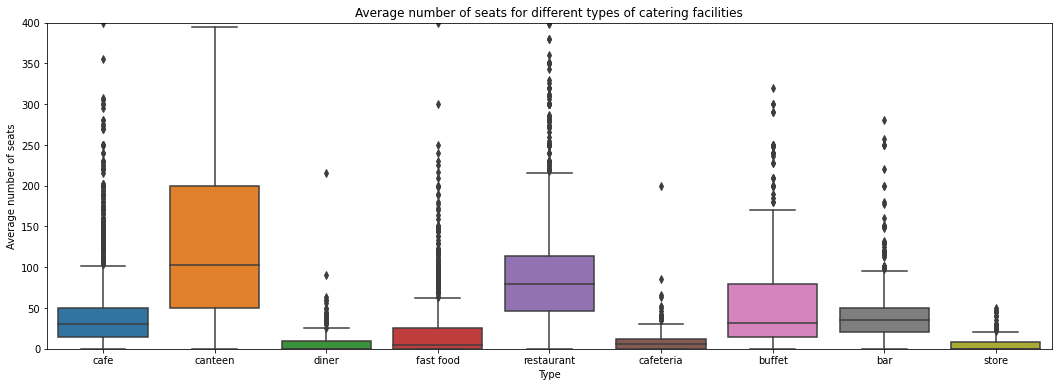

In [43]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='object_type', y ='number', data=df)
plt.ylim([0, 400])
plt.title('Average number of seats for different types of catering facilities')
plt.xlabel('Type')
plt.ylabel('Average number of seats')
plt.show()

<b>Results:</b> Canteens provide the largest number of seats on average (average 130, median 100)

#### Extracting street name from address string

Let's split by delimiter ","

In [44]:
street = df['address'].str.split(',', expand=True)
street

,0,1,2,3,4,5,6
0,город москва,улица егора абакумова,дом 9,None,None,None,None
1,город москва,улица талалихина,дом 2/1,корпус 1,None,None,None
2,город москва,абельмановская улица,дом 6,None,None,None,None
3,город москва,абрамцевская улица,дом 1,None,None,None,None
4,город москва,абрамцевская улица,дом 9,корпус 1,None,None,None
...,...,...,...,...,...,...,...
15361,город москва,3-й крутицкий переулок,дом 18,None,None,None,None
15362,город москва,улица земляной вал,дом 33,None,None,None,None
15363,город москва,улица земляной вал,дом 33,None,None,None,None
15364,город москва,поселение московский,киевское шоссе,22-й километр,домовладение 4,строение 1,None


Let's check

In [45]:
street[0].value_counts().reset_index()

,index,0
0,город москва,15295
1,улица ленинская слобода,4
2,николоямская улица,4
3,город московский,3
4,улица льва толстого,3
5,солянский тупик,3
6,2-я брестская улица,2
7,партизанская улица,2
8,ленинградский проспект,2
9,таганская площадь,2


The first column should contain the city. There are very few erroneous values - we leave it as it is. Let's check the second column

In [46]:
street[1].value_counts().reset_index().head(50)

,index,1
0,город зеленоград,232
1,проспект мира,204
2,профсоюзная улица,182
3,ленинградский проспект,171
4,пресненская набережная,167
5,варшавское шоссе,161
6,ленинский проспект,147
7,поселение сосенское,138
8,проспект вернадского,132
9,кутузовский проспект,114


We found some wrong values (Zelenograd, the settlement of Sosenskoye, the city of Moscow and the city of Troitsk) - all those values are located outside the city  -therefore not interesting for the current analysis.

Adding the street column to the main table

In [47]:
df["street_name"]= street[1].str.strip()
df

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,non-chain,cafe,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,non-chain,cafe,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,non-chain,cafe,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,chain,cafe,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,non-chain,cafe,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,chain,cafe,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,chain,cafe,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,209186,шоколадница,chain,cafe,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15364,221900,шоколадница,chain,cafe,"город москва, поселение московский, киевское ш...",36,поселение московский


Let's remove the rows with cities, settlements and villages outside the city and check

In [48]:
df = df[(~df['street_name'].str.contains('город '))&(~df['street_name'].str.contains('поселение '))&(~df['street_name'].str.contains('деревня '))]
df

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,non-chain,cafe,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,non-chain,cafe,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,non-chain,cafe,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,chain,cafe,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,non-chain,cafe,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15360,219759,шоколадница,chain,cafe,"город москва, улица вавилова, дом 3",36,улица вавилова
15361,208537,шоколадница,chain,cafe,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,chain,cafe,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,209186,шоколадница,chain,cafe,"город москва, улица земляной вал, дом 33",20,улица земляной вал


In [49]:
df[df['street_name'].str.contains('город ')].groupby('street_name')['id'].count()

Series([], Name: id, dtype: int64)

In [50]:
df[df['street_name'].str.contains('поселение ')].groupby('street_name')['id'].count()

Series([], Name: id, dtype: int64)

In [51]:
df[df['street_name'].str.contains('деревня ')].groupby('street_name')['id'].count()

Series([], Name: id, dtype: int64)

<b>Results:</b>  
We created a column with streets and deleted irrelevant entries.

#### The top 10 streets by the number of catering facilities

In [52]:
top10streets = df.groupby('street_name')['id'].count().sort_values(ascending=False).head(10).reset_index()
top10streets

,street_name,id
0,проспект мира,204
1,профсоюзная улица,182
2,ленинградский проспект,171
3,пресненская набережная,167
4,варшавское шоссе,161
5,ленинский проспект,147
6,проспект вернадского,132
7,кутузовский проспект,114
8,каширское шоссе,112
9,кировоградская улица,110


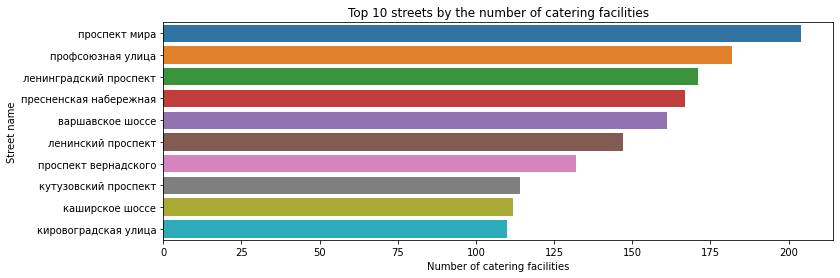

In [53]:
plt.figure(figsize=(12, 4))
sns.barplot(y='street_name', x ='id', data=top10streets)
plt.title('Top 10 streets by the number of catering facilities')
plt.xlabel('Number of catering facilities')
plt.ylabel('Street name')
plt.show()

Let's create a key column to do join (in case we have to do some manipulations with the name of the street)

In [54]:
top10streets['key'] = top10streets['street_name']
top10streets

,street_name,id,key
0,проспект мира,204,проспект мира
1,профсоюзная улица,182,профсоюзная улица
2,ленинградский проспект,171,ленинградский проспект
3,пресненская набережная,167,пресненская набережная
4,варшавское шоссе,161,варшавское шоссе
5,ленинский проспект,147,ленинский проспект
6,проспект вернадского,132,проспект вернадского
7,кутузовский проспект,114,кутузовский проспект
8,каширское шоссе,112,каширское шоссе
9,кировоградская улица,110,кировоградская улица


street - district table
https://hubofdata.ru/dataset/mosgaz-contacts/resource/92b3edb3-f4c8-4562-9338-264a666d0965
<br>
import from google sheets:
https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550

In [55]:
sheet_id = '1VITMIh7BbkkhWjMR2LUSaJSBdwxoYLTF8NNFjCIOqs0'
sheet_name = 'Yandex_praktikum_1'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [56]:
mosgaz=pd.read_csv(url)
mosgaz

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


Removing spaces, converting to lowercase

In [57]:
mosgaz['key'] = mosgaz['streetname'].str.lower().str.strip()
mosgaz

,streetname,areaid,okrug,area,key
0,Выставочный переулок,17,ЦАО,Пресненский район,выставочный переулок
1,улица Гашека,17,ЦАО,Пресненский район,улица гашека
2,Большая Никитская улица,17,ЦАО,Пресненский район,большая никитская улица
3,Глубокий переулок,17,ЦАО,Пресненский район,глубокий переулок
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район,большой гнездниковский переулок
...,...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район,вознесенский проезд
4394,Волков переулок,17,ЦАО,Пресненский район,волков переулок
4395,Поварская улица,17,ЦАО,Пресненский район,поварская улица
4396,Кудринская площадь,17,ЦАО,Пресненский район,кудринская площадь


In [58]:
top10streets.merge(mosgaz, how='left', on='key')

,street_name,id,key,streetname,areaid,okrug,area
0,проспект мира,204,проспект мира,проспект Мира,70,СВАО,Алексеевский район
1,проспект мира,204,проспект мира,проспект Мира,86,СВАО,Ярославский Район
2,проспект мира,204,проспект мира,проспект Мира,78,СВАО,Район Марьина роща
3,проспект мира,204,проспект мира,проспект Мира,79,СВАО,Останкинский район
4,проспект мира,204,проспект мира,проспект Мира,81,СВАО,Район Ростокино
5,проспект мира,204,проспект мира,проспект Мира,82,СВАО,Район Свиблово
6,проспект мира,204,проспект мира,проспект Мира,16,ЦАО,Мещанский район
7,профсоюзная улица,182,профсоюзная улица,Профсоюзная улица,123,ЮЗАО,Академический район
8,профсоюзная улица,182,профсоюзная улица,Профсоюзная улица,132,ЮЗАО,Район Черемушки
9,профсоюзная улица,182,профсоюзная улица,Профсоюзная улица,134,ЮЗАО,Район Ясенево


<b>Results:</b> It can be seen that almost all the top streets (by the number of establishments) are just long streets passing through several districts. It is obvious that on these streets the density of establishments in the city centre is higher, while on the outskirts it is much lower. Therefore, we will make an alternative top of streets, taking into account the length of the street expressed in the number of districts.

Let's calculate the number of districts for each street

In [59]:
mosgaz_streets = mosgaz.groupby('key')['area'].count().reset_index()
mosgaz_streets

,key,area
0,1-й автозаводский проезд,1
1,1-й амбулаторный проезд,1
2,1-й архивный переулок,1
3,1-й бабьегородский переулок,1
4,1-й балтийский переулок,1
...,...,...
3599,яузская аллея,1
3600,яузская улица,1
3601,яузский бульвар,1
3602,яхромская улица,1


We will make a summary of the number of establishments by street again

In [60]:
top_streets = df.groupby('street_name')['id'].count().sort_values(ascending=False).reset_index()
top_streets

,street_name,id
0,проспект мира,204
1,профсоюзная улица,182
2,ленинградский проспект,171
3,пресненская набережная,167
4,варшавское шоссе,161
...,...,...
1867,улица девятая рота,1
1868,брошевский переулок,1
1869,улица демьяна бедного,1
1870,лосевская улица,1


We add the number of districts for each street to the set and calculate the number of establishments per street per district

In [61]:
alternative_top = top_streets.merge(mosgaz_streets, how='left', left_on='street_name', right_on='key')
alternative_top['number_per_area'] = alternative_top['id'] / alternative_top['area']
alternative_top.sort_values(by='number_per_area', ascending=False).head(10)

,street_name,id,key,area,number_per_area
3,пресненская набережная,167,пресненская набережная,1.0,167.0
10,ходынский бульвар,102,ходынский бульвар,1.0,102.0
13,улица новый арбат,92,улица новый арбат,1.0,92.0
15,улица ленинская слобода,85,улица ленинская слобода,1.0,85.0
17,пятницкая улица,80,пятницкая улица,1.0,80.0
22,улица арбат,77,улица арбат,1.0,77.0
21,улица покровка,77,улица покровка,1.0,77.0
27,тверская улица,68,тверская улица,1.0,68.0
28,автозаводская улица,67,автозаводская улица,1.0,67.0
29,ярославское шоссе,65,ярославское шоссе,1.0,65.0


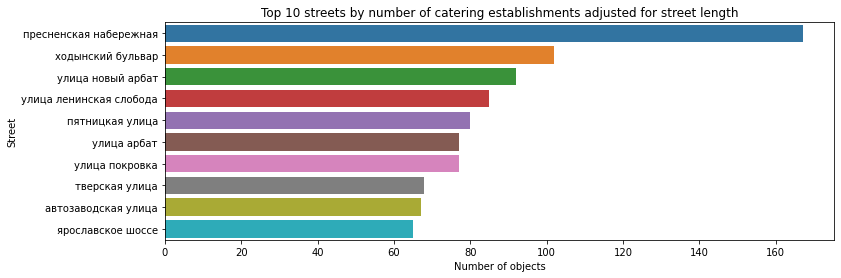

In [62]:
plt.figure(figsize=(12, 4))
sns.barplot(y='street_name', x ='number_per_area', data=alternative_top.sort_values(by='number_per_area', ascending=False).head(10))
plt.title('Top 10 streets by number of catering establishments adjusted for street length')
plt.xlabel('Number of objects')
plt.ylabel('Street')
plt.show()

<b>Results:</b> It can be seen that the top has changed and now there are streets on top with a high density of establishments: in the first place is Presnenskaya Embankment (many offices + shopping center = a lot of catering); a large number of streets in the city centre

#### Streets with one catering facility (+ districts).

In [63]:
one_object = df.groupby('street_name')['id'].count().sort_values(ascending=False).reset_index()
one_object = one_object[one_object['id']==1]
one_object

,street_name,id
1298,3-й стрелецкий проезд,1
1299,3-й павловский переулок,1
1300,улица раевского,1
1301,улица рословка,1
1302,улица рокотова,1
...,...,...
1867,улица девятая рота,1
1868,брошевский переулок,1
1869,улица демьяна бедного,1
1870,лосевская улица,1


In [64]:
len(one_object)

574

Let's create a column with a key by which we will combine with the district table

In [65]:
one_object['key'] = one_object['street_name']
one_object

,street_name,id,key
1298,3-й стрелецкий проезд,1,3-й стрелецкий проезд
1299,3-й павловский переулок,1,3-й павловский переулок
1300,улица раевского,1,улица раевского
1301,улица рословка,1,улица рословка
1302,улица рокотова,1,улица рокотова
...,...,...,...
1867,улица девятая рота,1,улица девятая рота
1868,брошевский переулок,1,брошевский переулок
1869,улица демьяна бедного,1,улица демьяна бедного
1870,лосевская улица,1,лосевская улица


In [66]:
t = one_object.merge(mosgaz, how='left', on='key')
t

,street_name,id,key,streetname,areaid,okrug,area
0,3-й стрелецкий проезд,1,3-й стрелецкий проезд,3-й Стрелецкий проезд,78.0,СВАО,Район Марьина роща
1,3-й павловский переулок,1,3-й павловский переулок,3-й Павловский переулок,98.0,ЮАО,Даниловский район
2,улица раевского,1,улица раевского,улица Раевского,38.0,ЗАО,Район Дорогомилово
3,улица рословка,1,улица рословка,улица Рословка,88.0,СЗАО,Район Митино
4,улица рокотова,1,улица рокотова,улица Рокотова,134.0,ЮЗАО,Район Ясенево
...,...,...,...,...,...,...,...
612,улица девятая рота,1,улица девятая рота,улица Девятая Рота,34.0,ВАО,Район Преображенское
613,брошевский переулок,1,брошевский переулок,Брошевский переулок,18.0,ЦАО,Таганский район
614,улица демьяна бедного,1,улица демьяна бедного,улица Демьяна Бедного,92.0,СЗАО,Район Хорошево-Мневники
615,лосевская улица,1,лосевская улица,Лосевская улица,86.0,СВАО,Ярославский Район


Let's check the number of empty districts

In [67]:
len(t[t['area'].isnull()])

57

10% - not much, leave as is

Let's group by districts

In [68]:
t.groupby('area')['id'].count().sort_values(ascending=False).reset_index()

,area,id
0,Таганский район,27
1,Район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,19
...,...,...
94,Район Марьино,1
95,Район Матушкино-Савелки,1
96,Район Метрогородок,1
97,Район Москворечье-Сабурово,1


<b>Results:</b> The number of streets with one establishment is 620. Most of these streets are located in the central districts (Tagansky, Khamovniki, etc.), which can be explained by the size of the streets: there are small streets and lanes in the city center.

#### Patterns in the distribution of the number of seats for streets with a large number of catering facilities.

We use the streets from the alternative top.

In [69]:
t = alternative_top.sort_values(by='number_per_area', ascending=False).head(10)
t

,street_name,id,key,area,number_per_area
3,пресненская набережная,167,пресненская набережная,1.0,167.0
10,ходынский бульвар,102,ходынский бульвар,1.0,102.0
13,улица новый арбат,92,улица новый арбат,1.0,92.0
15,улица ленинская слобода,85,улица ленинская слобода,1.0,85.0
17,пятницкая улица,80,пятницкая улица,1.0,80.0
22,улица арбат,77,улица арбат,1.0,77.0
21,улица покровка,77,улица покровка,1.0,77.0
27,тверская улица,68,тверская улица,1.0,68.0
28,автозаводская улица,67,автозаводская улица,1.0,67.0
29,ярославское шоссе,65,ярославское шоссе,1.0,65.0


In [70]:
df

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,non-chain,cafe,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,non-chain,cafe,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,non-chain,cafe,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,chain,cafe,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,non-chain,cafe,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15360,219759,шоколадница,chain,cafe,"город москва, улица вавилова, дом 3",36,улица вавилова
15361,208537,шоколадница,chain,cafe,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,chain,cafe,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,209186,шоколадница,chain,cafe,"город москва, улица земляной вал, дом 33",20,улица земляной вал


In [71]:
t = t.merge(df, on='street_name')
t

,street_name,id_x,key,area,number_per_area,id_y,object_name,chain,object_type,address,number
0,пресненская набережная,167,пресненская набережная,1.0,167.0,140422,ресторан «sixty»,non-chain,restaurant,"город москва, пресненская набережная, дом 12",300
1,пресненская набережная,167,пресненская набережная,1.0,167.0,156815,кафе «обедбуфет»,non-chain,buffet,"город москва, пресненская набережная, дом 10",237
2,пресненская набережная,167,пресненская набережная,1.0,167.0,58489,хлеб насущный,chain,cafe,"город москва, пресненская набережная, дом 10",88
3,пресненская набережная,167,пресненская набережная,1.0,167.0,24296,гудман,chain,restaurant,"город москва, пресненская набережная, дом 10",140
4,пресненская набережная,167,пресненская набережная,1.0,167.0,74554,старбакс,chain,cafe,"город москва, пресненская набережная, дом 10",32
...,...,...,...,...,...,...,...,...,...,...,...
875,ярославское шоссе,65,ярославское шоссе,1.0,65.0,217419,кафетерий при гостинице «саяны»,non-chain,cafeteria,"город москва, ярославское шоссе, дом 116, корп...",21
876,ярославское шоссе,65,ярославское шоссе,1.0,65.0,217427,кафе при гостинице «саяны»,non-chain,cafe,"город москва, ярославское шоссе, дом 116, корп...",84
877,ярославское шоссе,65,ярославское шоссе,1.0,65.0,217453,кафе при г-це максима,non-chain,cafe,"город москва, ярославское шоссе, дом 44",30
878,ярославское шоссе,65,ярославское шоссе,1.0,65.0,209065,мск московская сеть кальянных,chain,diner,"город москва, ярославское шоссе, дом 111",60


In [72]:
seats_number_distr = t['number'].sort_values(ascending=False)
seats_number_distr

836    500
569    480
48     478
776    455
825    450
      ... 
253      0
252      0
250      0
249      0
879      0
Name: number, Length: 880, dtype: int64

In [73]:
seats_number_distr.describe()

count    880.000000
mean      49.186364
std       63.469300
min        0.000000
25%       10.000000
50%       32.000000
75%       60.000000
max      500.000000
Name: number, dtype: float64

In [74]:
seats_number_distr.mode()

0    0
dtype: int64

Let's build a graph

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


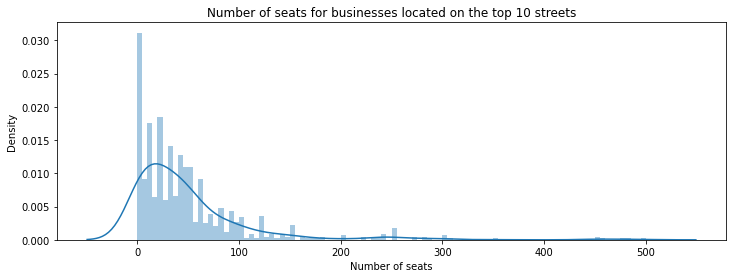

In [75]:
plt.figure(figsize=(12, 4))
sns.distplot(seats_number_distr, bins=100) 
plt.title('Number of seats for businesses located on the top 10 streets')
plt.xlabel('Number of seats')
plt.ylabel('Density')
plt.show()

Let's compare with the distribution of the same indicator for the entire sample

In [76]:
df['number'].describe()

count    14544.000000
mean        60.348872
std         75.396887
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

In [77]:
df['number'].mode()

0    0
dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


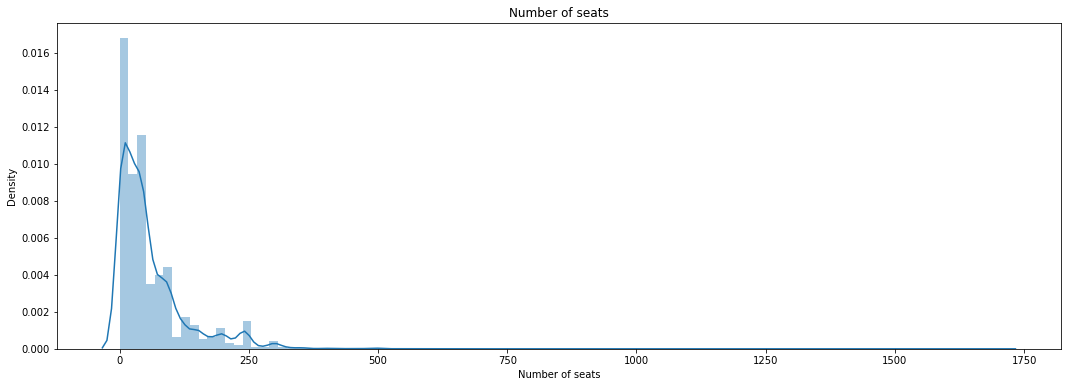

In [78]:
plt.figure(figsize=(18, 6))
sns.distplot(df['number'], bins=100) 
plt.title('Number of seats')
plt.xlabel('Number of seats')
plt.ylabel('Density')
plt.show()

<b>Results:</b> The distribution of seats on the top 10 streets resembles the distribution for the entire sample. The average (49) is slightly below the average (60). We also see a large number of establishments without seats - and this is the most popular number of seats (mode is 0)

#### Conclusion and recommendations

A study of the market of public catering establishments in Moscow was carried out. Irrelevant territories, located outside the city were excluded from the analysis.

<b>Conclusions:</b>
<br>
1. The most popular type of catering establishment is a cafe, 40% of establishments are of this type. Canteens, restaurants and fast food restaurants are in second place, each of these types accounts for 13 to 17% of establishments.
2. The overwhelming majority of establishments (80%) are non-chain. In a breakdown by type of public catering establishments, fast food restaurants have the largest number of chain establishments (41%); 23% cafes are chains. Canteens, buffets and bars have the smallest share of chains.
3. Most chains consist of a small number of establishments. The average number of locations in chains is 11. The average number of seats in chain enterprises is 53, the median is 40. Interestingly, 9% of chain businesses do not have seats.
4. Canteens have the highest number of seats, with an average of 130 seats. The cafe has an average of 40 seats.
5. Establishments are unevenly distributed throughout the city. The highest density is observed in the city centre, large shopping centers and office buildings. However, when assessing by streets, the top 10 streets are mainly the longest streets passing through several districts. When adjusted for the length of the street, the top 10 comprise mainly central streets of the city. As for the streets with single establishments, most of these streets are located in the city centre, which can be explained by the size of the streets: there are small streets and lanes in the center.
6. The distribution of seats on the top 10 streets basically coincides with the distribution for the entire sample. The average number of seats in the top 10  is 49, which is slightly lower than the average for the whole city (60). We can also note a large number of establishments without seats, both in the top 10 streets and in the entire city.


<b>Recommendations:</b>
<br>

Based on the study, the most advisable is to open a cafe with the following characteristics: the number of seats is about 50, location: top 10 streets by number of establishments. It is possible to consider a chain of several cafes.

(recommendations are given based on the choice of the most popular characteristics of the establishment at the moment and do not take into account the cost of rent, competition with neighboring establishments, target segments, etc.)

### Stage 3. Presentation

Презентация: https://drive.google.com/file/d/13ARf4mrHPSXg1r7bf8MjZ20NmXmpW8o_/view?usp=sharing